In [32]:
import jupyter
import pandas as pd
import spacy
import numpy as np

In [12]:
nlp = spacy.load("en_core_web_sm")
print(nlp.meta["version"])


3.4.1


## Exercise 1: Embedding 1

In [17]:
nlp = spacy.load("en_core_web_sm")


# Embed the word "car"
car = nlp("car")

# Access the vector for the word "car"
car_vector = car.vector

# Print out the shape of the car vector
print(car_vector.shape)

(96,)


In [19]:
# Sum the first 20 values of the car vector
sum_first_20 = sum(car_vector[:20])

print(sum_first_20)

# Print out the sum using float.as_integer_ratio()
print(sum_first_20.as_integer_ratio())

2.979017451405525
(199918477, 67108864)


In [21]:
# Calculate the floating-point value from both ratios
expected_ratio = (99959115, 33554432)
observed_ratio = (199918477, 67108864)

# Convert ratios to floats
expected_float = expected_ratio[0] / expected_ratio[1]
observed_float = observed_ratio[0] / observed_ratio[1]

expected_float, observed_float

(2.9790137708187103, 2.979017451405525)

The calculations show that both the expected (99959115, 33554432) and observed 
(199918477, 67108864) ratios convert to floating-point values that are extremely close to each other:
approximately 2.9790. This small discrepancy between the two floating-point values is likely due to the precision limitations inherent in floating-point arithmetic

## Exercise 2: Tokenization

In [29]:
# Your text
text = "Tokenize this sentence. And this one too."

# Process the text
doc = nlp(text)

# Iterate over tokens in the doc
tokens = [token.text for token in doc]

for token in tokens:
    print(token)



Tokenize
this
sentence
.
And
this
one
too
.


## Exercise 3: Embeddings 2

In [34]:
!python -m spacy download en_core_web_md

DEPRECATION: https://github.com/explosion/spacy-models/releases/download/en_core_web_md-3.4.1/en_core_web_md-3.4.1-py3-none-any.whl#egg=en_core_web_md==3.4.1 contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remove the egg fragment. Discussion can be found at https://github.com/pypa/pip/issues/11617
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 8.7 MB/s eta 0:00:00m eta 0:00:010:00:01

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [50]:
# Your sentence
nlp = spacy.load("en_core_web_md")  # Make sure you have this version installed

# Tokenize the sentence and compute the embeddings
doc = nlp("laptop computer coffee tea water liquid dog cat kitty")

embedding_sum = sum(doc[0].vector[:20])

embedding_sum

5.710388891398907

Embeddings_shapes: 
 [(300,), (300,), (300,), (300,), (300,), (300,), (300,), (300,), (300,)]


The sum of the first 20 values of the embedding of laptop: 
 5.710388




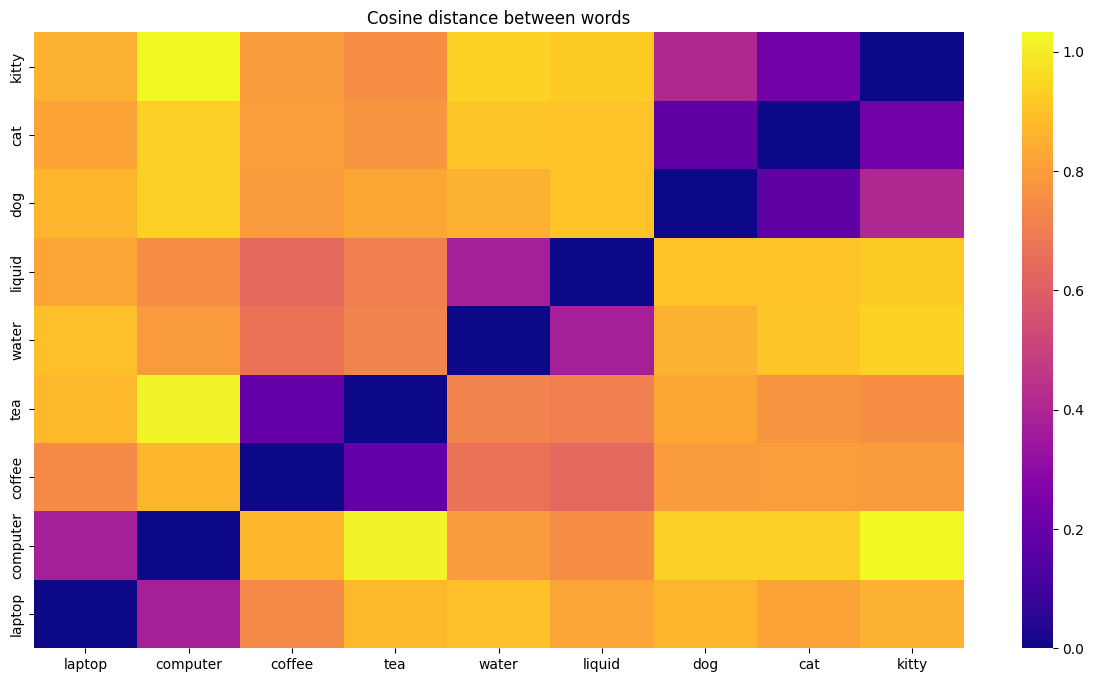

In [52]:

import spacy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the medium English model
nlp = spacy.load("en_core_web_md")

# The given sentence
sentence = "laptop computer coffee tea water liquid dog cat kitty"

# Process the sentence to get the tokens
tokens = nlp(sentence)

# Compute the embeddings and store them in an array
embeddings = np.array([token.vector for token in tokens])

# Check if each embedding has the shape of (300,)
embeddings_shapes = [emb.shape for emb in embeddings]
print("Embeddings_shapes: \n", embeddings_shapes)
print("\n")

# Calculate the sum of the first 20 values of the 'laptop' embedding
laptop_first_20_sum = np.sum(embeddings[0][:20])
print("The sum of the first 20 values of the embedding of laptop: \n", laptop_first_20_sum)
print("\n")

# Calculate the pairwise cosine distances
from scipy.spatial.distance import pdist, squareform

# Compute the cosine distances which gives us a condensed distance matrix
cosine_distances = pdist(embeddings, metric='cosine')

# Convert the condensed distance matrix to a square matrix
square_cosine_distances = squareform(cosine_distances)

# Convert the tokens to strings for labeling
token_texts = [token.text for token in tokens]

# Plot the heatmap with correct labels

# Define the size of the figure
plt.figure(figsize=(15, 8))

# Reverse the order of the tokens for the y-axis
token_texts_y = list(reversed(token_texts))

# Reverse the square_cosine_distances matrix along the y-axis
square_cosine_distances_reversed = square_cosine_distances[::-1]

# Plot the heatmap with the adjusted color map and reversed y-axis
sns.heatmap(square_cosine_distances_reversed, fmt=".2f", cmap="plasma",
            xticklabels=token_texts, yticklabels=token_texts_y)

# Title of the heatmap
plt.title('Cosine distance between words')

# Display the heatmap
plt.show()
     

## Exercise 4: Sentences' similarity

In [54]:
# Load the small English model
nlp = spacy.load("en_core_web_sm")

# Define the sentences
sentence_texts = [
    "I want to buy shoes",
    "I would love to purchase running shoes",
    "I am in my room"
]

# Process the sentences to get the tokens and then compute the average vector for each sentence
sentence_vectors = np.array([nlp(sentence).vector for sentence in sentence_texts])

# Calculate the pairwise cosine similarity (instead of cosine distances)
from scipy.spatial.distance import cosine

# Function to compute cosine similarity
def compute_cosine_similarity(vec1, vec2):
    # Compute cosine distance and then take its complement to get similarity
    return 1 - cosine(vec1, vec2)

# Compute the similarities
similarity_1_2 = compute_cosine_similarity(sentence_vectors[0], sentence_vectors[1])
similarity_1_3 = compute_cosine_similarity(sentence_vectors[0], sentence_vectors[2])
similarity_2_3 = compute_cosine_similarity(sentence_vectors[1], sentence_vectors[2])

print(f"Similarity between sentence 1 and 2: {similarity_1_2}")
print(f"Similarity between sentence 1 and 3: {similarity_1_3}")
print(f"Similarity between sentence 2 and 3: {similarity_2_3}")


Similarity between sentence 1 and 2: 0.6591542117284649
Similarity between sentence 1 and 3: 0.4167052551236612
Similarity between sentence 2 and 3: 0.2896134562238202


## Exercise 5: NER

In [57]:
nlp = spacy.load("en_core_web_sm")


text = "Apple Inc. is an American multinational technology company headquartered in Cupertino, California, that designs, develops, and sells consumer electronics, computer software, and online services. It is considered one of the Big Five companies in the U.S. information technology industry, along with Amazon, Google, Microsoft, and Facebook.Apple was founded by Steve Jobs, Steve Wozniak, and Ronald Wayne in April 1976 to develop and sell Wozniak's Apple I personal computer, though Wayne sold his share back within 12 days. It was incorporated as Apple Computer, Inc., in January 1977, and sales of its computers, including the Apple I and Apple II, grew quickly."
# Process the text
doc = nlp(text)

# Extract entities and their labels
entities = [(entity.text, entity.label_) for entity in doc.ents]

for entity, label in entities:
    print(f"{entity} {label}")

Apple Inc. ORG
American NORP
Cupertino GPE
California GPE
Five CARDINAL
U.S. GPE
Amazon ORG
Google ORG
Microsoft ORG
Facebook ORG
Steve Jobs PERSON
Steve Wozniak PERSON
Ronald Wayne PERSON
April 1976 DATE
Wozniak PERSON
Wayne PERSON
12 days DATE
Apple Computer, Inc. ORG
January 1977 DATE
the Apple I and Apple II ORG


In [60]:
# Sentence for NER disambiguation
sentence = "Paul eats an apple while watching a movie on his Apple device."

# Process the sentence
doc = nlp(sentence)

# Extract named entities, start_char, end_char, and their labels
entities_sentence = [(entity.text, entity.start_char, entity.end_char, entity.label_) for entity in doc.ents]

for entity, start_char, end_char, label in entities_sentence:
    print(f"{entity} {start_char + 1} {end_char + 1} {label}")

Paul 1 5 PERSON
Apple 50 55 ORG


## Exercise 6: Part-of-speech tags

In [63]:
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_md")

# Read text from 'news_amazon.txt'
with open('news_amazon.txt', 'r') as file:
    text = file.read()

# Process the text with spaCy
doc = nlp(text)

# Find sentences containing 'Bezos' tagged as a proper noun (PROPN)
bezos_sentences = [sent.text for sent in doc.sents if any(token.text == "Bezos" and token.pos_ == "PROPN" for token in sent)]

# Print the sentences
for sentence in bezos_sentences:
    print("INFO:  Bezos PROPN NNP")
    print(f"Sentence: {sentence}\n")


INFO:  Bezos PROPN NNP
Sentence: Amazon (AMZN) enters 2021 with plenty of big opportunities, but is losing its lauded Chief Executive Jeff Bezos, who announced his plan to step aside in the third quarter.

INFO:  Bezos PROPN NNP
Sentence: Bezos will hand off his role as chief executive to Andy Jassy, the CEO of its cloud computing unit.

INFO:  Bezos PROPN NNP
Sentence: He's not leaving, as Bezos will transition to the role of Executive Chairman and remain active.

INFO:  Bezos PROPN NNP
Sentence: "When you look at our financial results, what you're actually seeing are the long-run cumulative results of invention," Bezos said in written remarks with the Amazon earnings release.

